<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Auto_sales_data_aug_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dask
!pip install dask[complete]
!pip install dask_ml
!pip install dask distributed --upgrade
!pip install dask[dataframe] --upgrade
!pip install dask[bag] --upgrade
!pip install dask[delayed] --upgrade
!pip install dask[array] --upgrade

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2024.10.0
    Uninstalling dask-2024.10.0:
      Successfully uninstalled dask-2024.10.0
  Attempting uninstall: distributed
    Found existing installation: d

In [2]:
!pip install scikit-learn
!pip install sklearn-time
!pip install snapml
!pip install matplotlib
!pip install pandas
!pip install numpy

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-time: filename=sklearn_time-0.0.1-py3-none-any.whl size=1074 sha256=0143c8e07a89293f758ac7810e3fc239c749933f1d31a02fff200d8ecba53614
  Stored in directory: /root/.cache/pip/wheels/b5/d7/96/129f1943c6fc522bac49e6d5e65d9e897f8bac27acbd9dc90c
Successfully built sklearn-time
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 13.6 MB/s eta 0:00:00


In [3]:
from __future__ import print_function
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, classification_report, confusion_matrix, f1_score, jaccard_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [4]:
#Task1
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
df = pd.read_csv(URL)

In [5]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [6]:
df.dtypes

,0
model,object
year,int64
transmission,object
mileage,int64
fuelType,object
tax,float64
mpg,float64
engineSize,float64
price,int64


In [7]:
df.replace('?', np.NaN, inplace=True)

In [8]:
#Task2
df.isnull().sum()

,0
model,0
year,0
transmission,0
mileage,0
fuelType,0
tax,3
mpg,0
engineSize,0
price,0


In [9]:
avg_tax = round(df['tax'].mean(axis=0), 0)
df['tax'] = df['tax'].replace(np.NaN, avg_tax)

In [10]:
df.shape

(17966, 9)

In [11]:
df[df.duplicated(keep='first')]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
159,Focus,2016,Manual,30923,Diesel,0.0,74.3,1.5,10995
312,Focus,2019,Manual,7000,Petrol,145.0,58.9,1.0,14998
349,Focus,2019,Manual,7000,Petrol,145.0,58.9,1.0,14998
510,EcoSport,2019,Manual,5636,Diesel,145.0,68.9,1.5,15489
512,Grand Tourneo Connect,2019,Manual,3500,Diesel,145.0,61.4,1.5,19999
...,...,...,...,...,...,...,...,...,...
14556,Mondeo,2015,Manual,138000,Diesel,20.0,68.9,2.0,6793
15121,Kuga,2017,Manual,24877,Diesel,30.0,64.2,1.5,14999
15127,EcoSport,2019,Automatic,433,Petrol,150.0,45.6,1.0,16799
15685,KA,2008,Manual,63000,Petrol,160.0,45.6,1.3,1795


Thus, we expect after the removal of duplicates the total rows to be: 17966-154=17812

In [12]:
df = df.drop_duplicates(keep='first')
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17962,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17963,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17964,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


In [13]:
df.reset_index(inplace=True, drop=True)

In [14]:
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17807,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17808,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17809,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17810,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


In [ ]:
df.to_csv('auto_sales.csv')

data augmenting through Mostly.AI

In [ ]:
#Task3(optional)
from google.colab import files


uploaded = files.upload()


Saving auto_sales.csv to auto_sales (1).csv


In [ ]:
df1 = pd.read_csv('auto_sales (1).csv')

In [ ]:
df1

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2013,Manual,31156,Petrol,150,55.0,1.2,4934
1,Fiesta,2019,Manual,13,Petrol,145,48.9,1.1,12127
2,Kuga,2016,Semi-Auto,32296,Diesel,145,53.2,2.0,13999
3,Fiesta,2018,Manual,2984,Petrol,145,66.5,1.0,11450
4,Fiesta,2018,Manual,20852,Petrol,145,65.9,1.0,11068
...,...,...,...,...,...,...,...,...,...
17807,Kuga,2019,Manual,5982,Diesel,145,60.5,2.0,21005
17808,Focus,2019,Manual,9382,Petrol,145,60.4,1.0,17051
17809,Fiesta,2015,Manual,54063,Petrol,125,55.1,1.2,5995
17810,Kuga,2018,Manual,28075,Diesel,145,54.3,2.0,21125


In [ ]:
df = pd.concat([df, df1], axis=0)

In [ ]:
df.to_csv('auto_data_augm.csv')

In [ ]:
df.isnull().sum()

,0
model,0
year,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0
price,0


In [ ]:
df[df.duplicated(keep='first')]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price


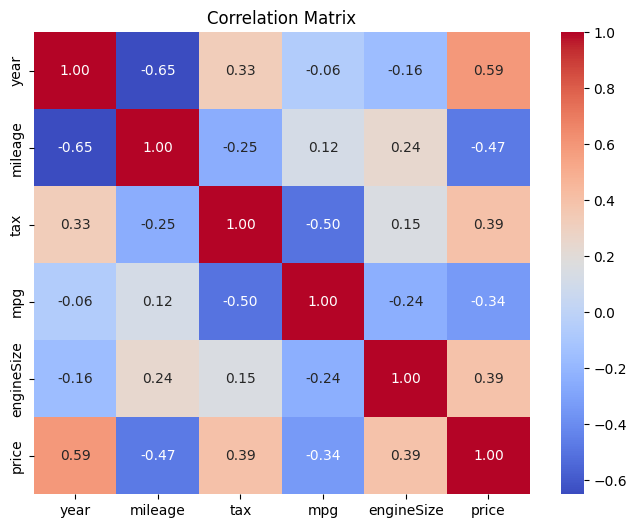

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
df_dummies = pd.get_dummies(df, dtype=int)

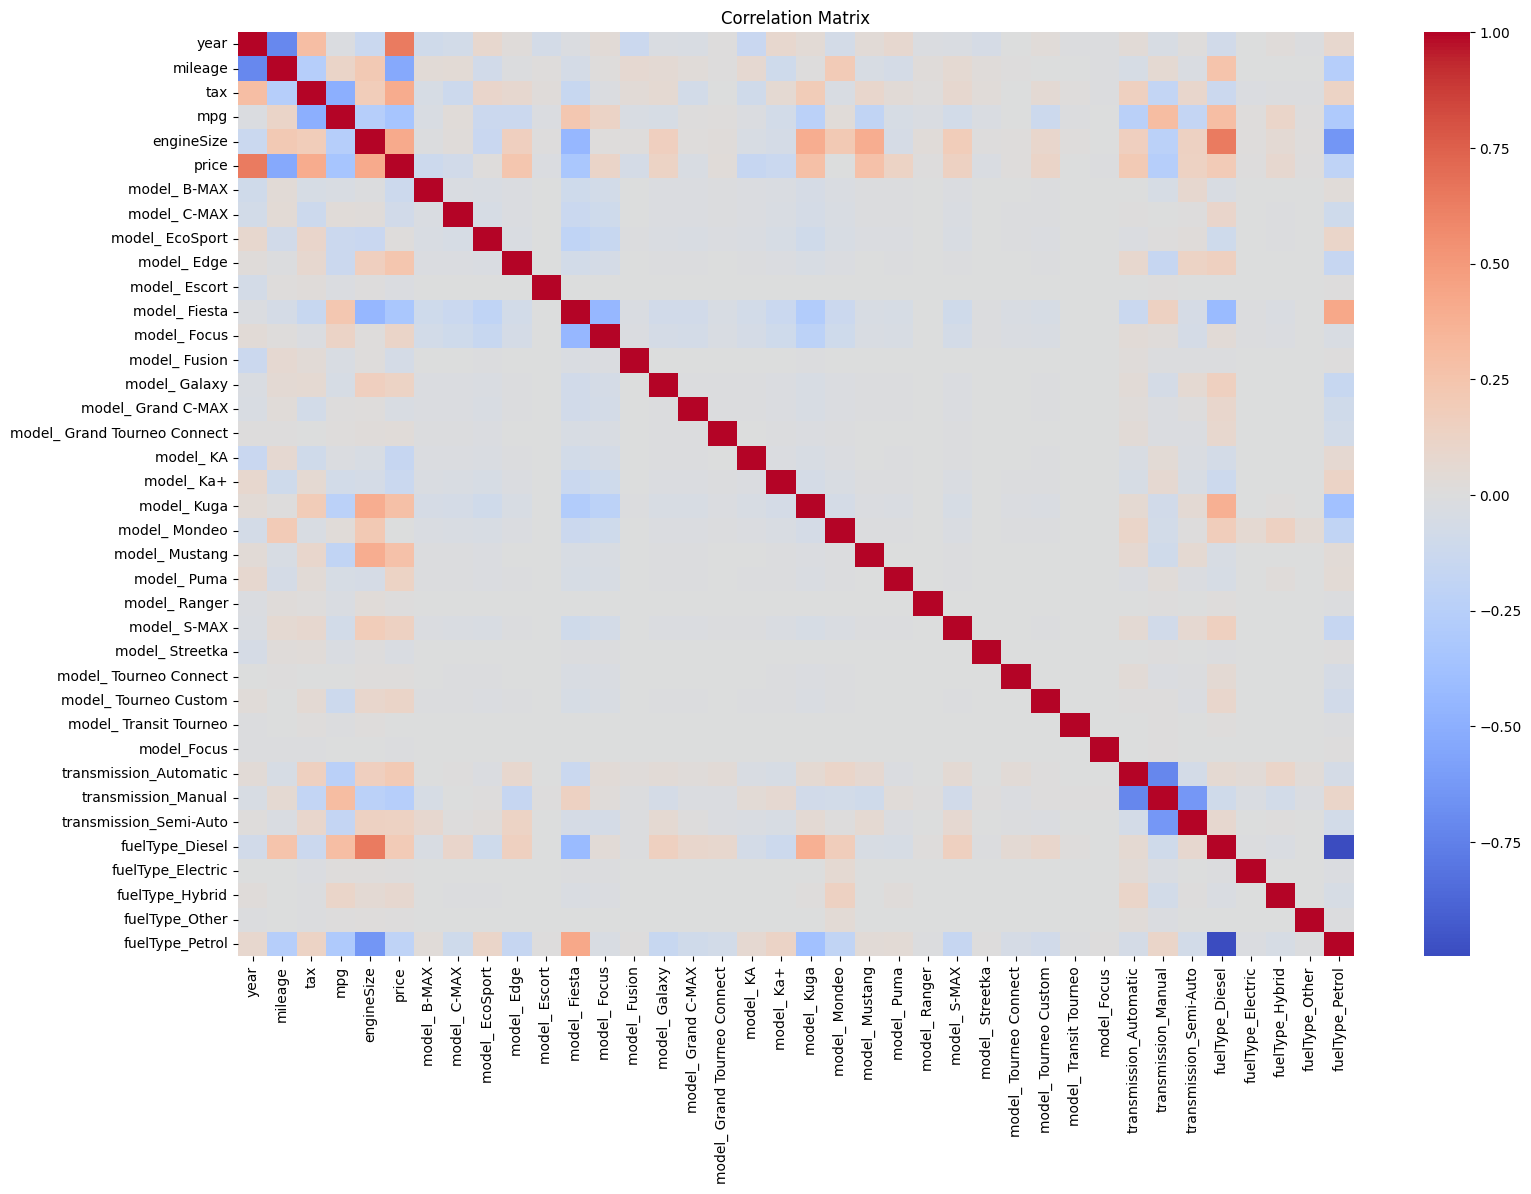

In [ ]:
corr_matrix = df_dummies.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Task4
corr_matrix['price'].drop('price').sort_values(ascending=False, key=abs).head(5)

,price
year,0.635715
mileage,-0.530483
engineSize,0.411451
tax,0.405970
mpg,-0.346263


In [ ]:
#Task5
df['fuelType'].value_counts()

,count
fuelType,
Petrol,12081
Diesel,5706
Hybrid,22
Electric,2
Other,1


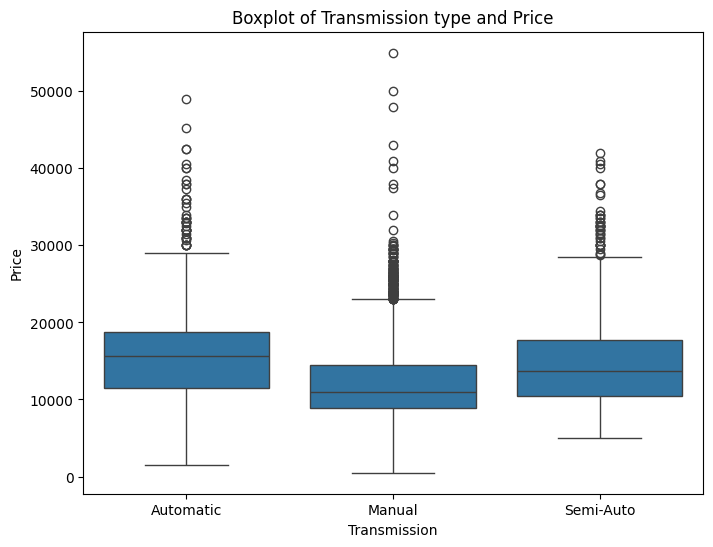

In [ ]:
#Task6
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Boxplot of Transmission type and Price')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

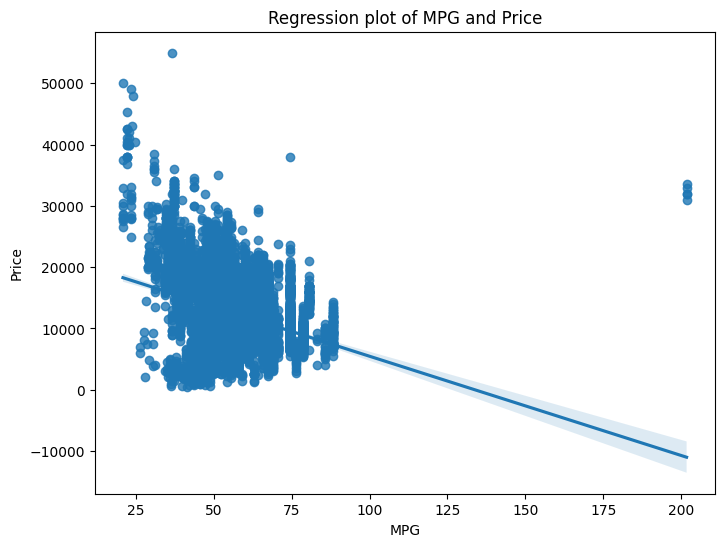

In [ ]:
#Task7
plt.figure(figsize=(8, 6))
sns.regplot(x='mpg', y='price', data=df)
plt.title('Regression plot of MPG and Price')
plt.xlabel('MPG')
plt.ylabel('Price')
plt.show()

In [16]:
#Linear Regression
X = df[['mpg']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 19049855.14 
R^2 = 0.15


In [17]:
#Multi-Linear Regression (5 features)
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 6912744.93 
R^2 = 0.69


In [18]:
#Task8
##Multi-Linear Regression (5 features) + Polynomial Features + Scaling (no train_test_spit)
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']

Input = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
X = X.astype(float)
pipe.fit(X, y)
yhat = pipe.predict(X)
mse = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 5234037.30 
R^2 = 0.77


In [19]:
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling
#This is wrong!
#The same as before but using train and test split.
#The scaling and polynomials before the split
#Worse!

# Create Scaler
X = StandardScaler().fit_transform(df[['year','mileage','tax','engineSize' ,'mpg']])
y = StandardScaler().fit_transform(df[['price']])

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=2)

# Transform the source variables into polynomial features
X_poly = polynomial_features.fit_transform(X)

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_scaled, y_train_scaled)


#Make predictions:
y_pred = model.predict(X_test_scaled)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test_scaled, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 0.4667434955712589
Coefficient of Determination (R^2): 0.5332565044287412


In [21]:
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling (degree=2)
#The same as before but correct order split->polynomials->scale->model
#Worse!
# Create Scaler
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
# Transform the source variables into polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_scaled, y_train)


#Make predictions:
y_pred = model.predict(X_test_scaled)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 19704762.40969775
Coefficient of Determination (R^2): 0.12122750086353073


In [25]:
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling (degree=3)
#The same as before but degree=3
#Worse!
# Create Scaler
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create polynomial features
poly_features = PolynomialFeatures(degree=3)
# Transform the source variables into polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_scaled, y_train)


#Make predictions:
y_pred = model.predict(X_test_scaled)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 55520119.084947385
Coefficient of Determination (R^2): -1.4760285247906206


In [26]:
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling (degree=2)
#The same as before but using polynomial features after train and test split.
#Better
#This is Wrong!

# Create Scaler
X = StandardScaler().fit_transform(df[['year','mileage','tax','engineSize' ,'mpg']])
y = StandardScaler().fit_transform(df[['price']])



#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

#polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.fit_transform(X_test_scaled)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_poly, y_train_scaled)


#Make predictions:
y_pred = model.predict(X_test_poly)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test_scaled, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 0.8212231682181089
Coefficient of Determination (R^2): 0.17877683178189108


In [67]:
#Task9
#Ridge + train_test_split
#Worse
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = Ridge(alpha=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 19694302.26 
R^2 = 0.12


In [66]:
#Task10
#Ridge + train_test_split + PolynomialFeatures
#The same as before but using polynomial features after train and test split.
#Much better
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = Ridge(alpha=1)
model.fit(X_train_poly, y_train)
yhat = model.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 6243527.41 
R^2 = 0.72


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [65]:
#Ridge + train_test_split + PolynomialFeatures + Scale
#The same as before, but with scaling after spit
#Worse
#Wrong
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.fit_transform(X_test_scaled)

model = Ridge(alpha=1)
model.fit(X_train_poly, y_train_scaled)
yhat = model.predict(X_test_poly)

mse = mean_squared_error(y_test_scaled, yhat)
r2 = r2_score(y_test_scaled, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 0.82 
R^2 = 0.18


In [64]:
#Ridge + train_test_split + PolynomialFeatures + Scale
#The same as before, but with scaling before spit
#Worse
#Wrong
X = StandardScaler().fit_transform(df[['year','mileage','tax','engineSize' ,'mpg']])
y = StandardScaler().fit_transform(df[['price']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

model = Ridge(alpha=1)
model.fit(X_train_poly, y_train)
yhat = model.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 0.88 
R^2 = 0.12


In [63]:
#Ridge + train_test_split + PolynomialFeatures + Scale
#The same as before, but with scaling after polynomials
#Correct order split->polynomials->scale->model
#Better, much better
#Wrong:fit_transform only on the train!Also y don't need scale
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train_poly)
X_test_scaled = StandardScaler().fit_transform(X_test_poly)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

model = Ridge(alpha=1)
model.fit(X_train_scaled, y_train_scaled)
yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, yhat)
r2 = r2_score(y_test_scaled, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 0.30 
R^2 = 0.70


In [62]:
#Ridge + train_test_split + PolynomialFeatures(degree=2) + Scale
#The same as before, but with correct (no fit_transform on test)
#Correct order split->polynomials->scale->model
#No change

X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


model = Ridge(alpha=1)
model.fit(X_train_scaled, y_train)
yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 6691619.68 
R^2 = 0.70


In [59]:
#Ridge + train_test_split + PolynomialFeatures(degree=3) + Scale
#The same as before, but with correct (no fit_transform on test)
#Correct order split->polynomials->scale->model
#Minimal change for degree

X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


model = Ridge(alpha=1)
model.fit(X_train_scaled, y_train)
yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 6031721.74 
R^2 = 0.73


In [70]:
#Task11
#Ridge + train_test_split + PolynomialFeatures + GridSearchCV
#Much Very Worse-> no Scale which is very importan in Ridge, i.e all features are reularized equally
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

model = GridSearchCV(regressor, param_grid, cv=4)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

The best parameter is: {'alpha': 0.01}
The best estimator is: Ridge(alpha=0.01)
MSE = 13840988.50 
R^2 = 0.38


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.64735e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [71]:
#Ridge + train_test_split + PolynomialFeatures + StandardScaler + GridSearchCV
#The same as before but with scaling before split
#no diferrence.
#Wrong order
X = StandardScaler().fit_transform(df[['year','mileage','tax','engineSize' ,'mpg']])
y = StandardScaler().fit_transform(df[['price']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

model = GridSearchCV(regressor, param_grid, cv=4)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'alpha': 10.0}
The best estimator is: Ridge(alpha=10.0)
MSE = 0.87 
R^2 = 0.13


In [72]:
#Ridge + train_test_split + PolynomialFeatures(degree=2) + StandardScaler + GridSearchCV
#no diferrence.
#Correct order
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

model = GridSearchCV(regressor, param_grid, cv=4)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

The best parameter is: {'alpha': 0.01}
The best estimator is: Ridge(alpha=0.01)
MSE = 13840988.50 
R^2 = 0.38


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.79036e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.73946e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.87056e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.64735e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

In [73]:
#Ridge + train_test_split + PolynomialFeatures(degree=3) + StandardScaler + GridSearchCV
#no diferrence.
#Correct order
#Better->degree=3
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

model = GridSearchCV(regressor, param_grid, cv=4)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.60338e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.38903e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.5875e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.36704e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning

The best parameter is: {'alpha': 1.0}
The best estimator is: Ridge()
MSE = 13826782.67 
R^2 = 0.38


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.38989e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.59476e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.29867e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.81898e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [74]:
#Ridge + train_test_split + PolynomialFeatures(degree=3) + StandardScaler + GridSearchCV
#The same as before but with all the dataset (df_dummies)
#Better.
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent
#Wrong order
X = StandardScaler().fit_transform(df_dummies.drop('price', axis=1))
y = StandardScaler().fit_transform(df_dummies[['price']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.0001, 0.001,0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'alpha': 100.0}
The best estimator is: Ridge(alpha=100.0)
MSE = 0.41 
R^2 = 0.59


In [80]:
#with df_dummies!
#Ridge + train_test_split +polynomials(degree=2) + StandardScaler + GridSearchCV
#The same as before GridSearchCV
#the correct order of transformations split->polynomials->scale->GridSearchCV
#Big diferrence! -> df_dummies
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"

X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.0001, 0.001,0.01, 0.1, 1.0, 10.0, 100.0]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'alpha': 10.0}
The best estimator is: Ridge(alpha=10.0)
MSE = 2896112.80 
R^2 = 0.87


In [81]:
#SVR + train_test_split + StandardScaler
#Huge difference!
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(C=1000, gamma=0.01)

# Define the hyperparameter values for the grid search
#param_grid = {'kernel':('linear', 'rbf', 'sigmoid'),
#              'C': [0.01, 0.1, 1, 10],
#              'gamma':[0.01, 0.1, 1]}

model.fit(X_train_scaled, y_train)


yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 2265107.73 
R^2 = 0.90


In [82]:
#SVR + train_test_split + +polynomials + StandardScaler
#No difference
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(C=1000, gamma=0.01)

# Define the hyperparameter values for the grid search
#param_grid = {'kernel':('linear', 'rbf', 'sigmoid'),
#              'C': [0.01, 0.1, 1, 10],
#              'gamma':[0.01, 0.1, 1]}

model.fit(X_train_scaled, y_train)


yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 2265107.73 
R^2 = 0.90


In [ ]:
#SVR + train_test_split + StandardScaler + GridSearchCV
#Significant improvement. The best one!
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"

X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = SVR()

# Define the hyperparameter values for the grid search
param_grid = {'kernel':('linear', 'rbf' ),
              'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma':[0.01, 0.1, 1]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

In [ ]:
#SVR + train_test_split + PolynomialFeatures + StandardScaler + GridSearchCV
#The same as before but with polynomial features too.
#Worse with polynomial, at least for degree = 2. It chose linear as the best kernel, instead of rbf
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
#The correct order is train_test_split->PolynomialFeatures->StandardScaler->model
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = SVR()

# Define the hyperparameter values for the grid search
param_grid = {'kernel':('linear', 'rbf' ),
              'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma':[0.01, 0.1, 1]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
The best estimator is: SVR(C=100, gamma=0.01, kernel='linear')
MSE = 2874500.99 
R^2 = 0.87


In [ ]:
#The same as before but with polynomial degree=3.
#worse with polynomial, at least for degree = 2. In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
#The correct order is train_test_split->PolynomialFeatures->StandardScaler->model
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = SVR()

# Define the hyperparameter values for the grid search
param_grid = {'kernel':('linear', 'rbf' ),
              'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma':[0.01, 0.1, 1]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

In [ ]:
#The same as before but with polynomial degree=2 and model= regressor tree .
#The same with polynomial, at least for degree = 2. In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
#The correct order is train_test_split->PolynomialFeatures->StandardScaler->model
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter values for the grid search
param_grid = { 'criterion': ['squared_error', 'friedman_mse'], # Focus on best-performing criteria
              'max_depth': [10, 20, 30, None], # Limit depth (None = unlimited depth)
               'min_samples_split': [5, 10, 20], # Avoid splits with very few samples
               'min_samples_leaf': [2, 5, 10],  # Prevent too-small leaves
               'max_features': ['sqrt', 'log2'], # Limit features per split for better generalization
                'splitter': ['best'] # 'best' is faster and more reliable than 'random'
                }



model = GridSearchCV(regressor, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

Fitting 4 folds for each of 144 candidates, totalling 576 fits
The best parameter is: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'splitter': 'best'}
The best estimator is: DecisionTreeRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=20, random_state=42)
MSE = 2861304.39 
R^2 = 0.87
